# Analysis of crosslinked dataset

This notebook visulize a preliminary dataset of crossslinked proteins in T. Brucei.

In [70]:
#importing usefull library
from IPython.display import Image
from IPython.core.display import HTML
import matplotlib.pyplot as plt 
import scipy.cluster.hierarchy as sch
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np

## Protocol outline

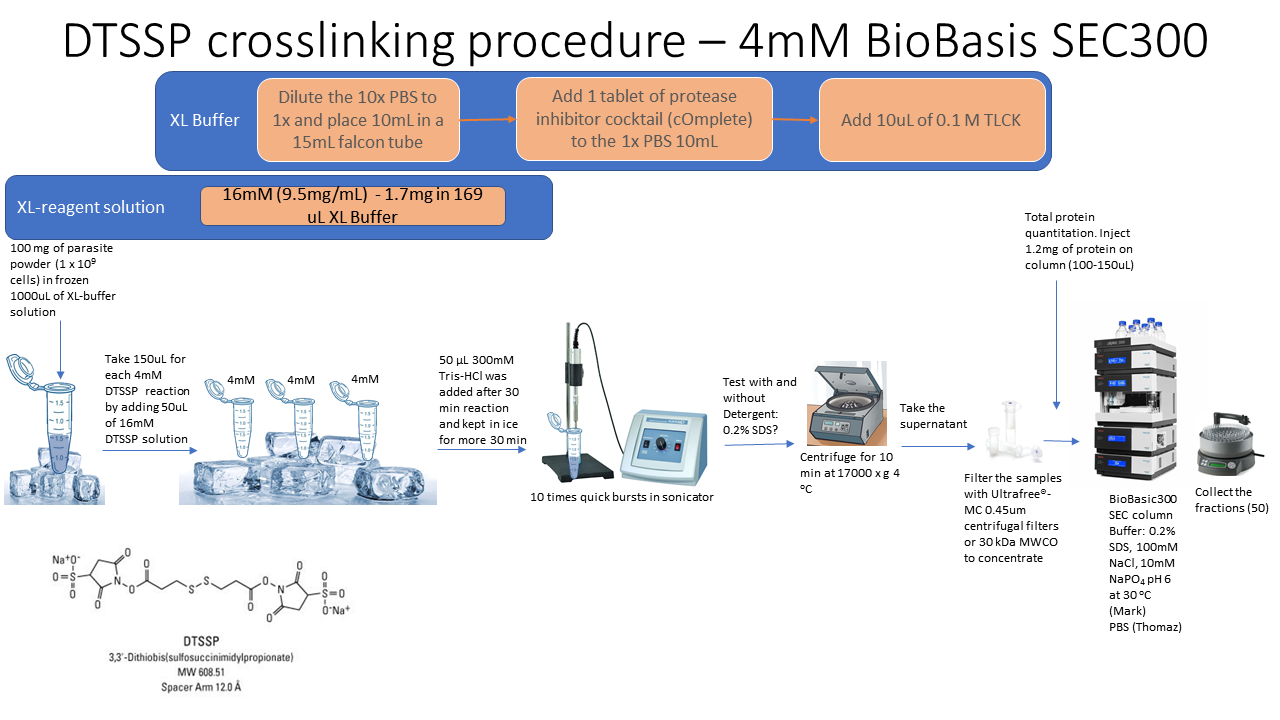

In [71]:
Image('test_small/PD1_4/X-Link.png')

### For this analysis 10 fractions were collected from a SEC1000 column

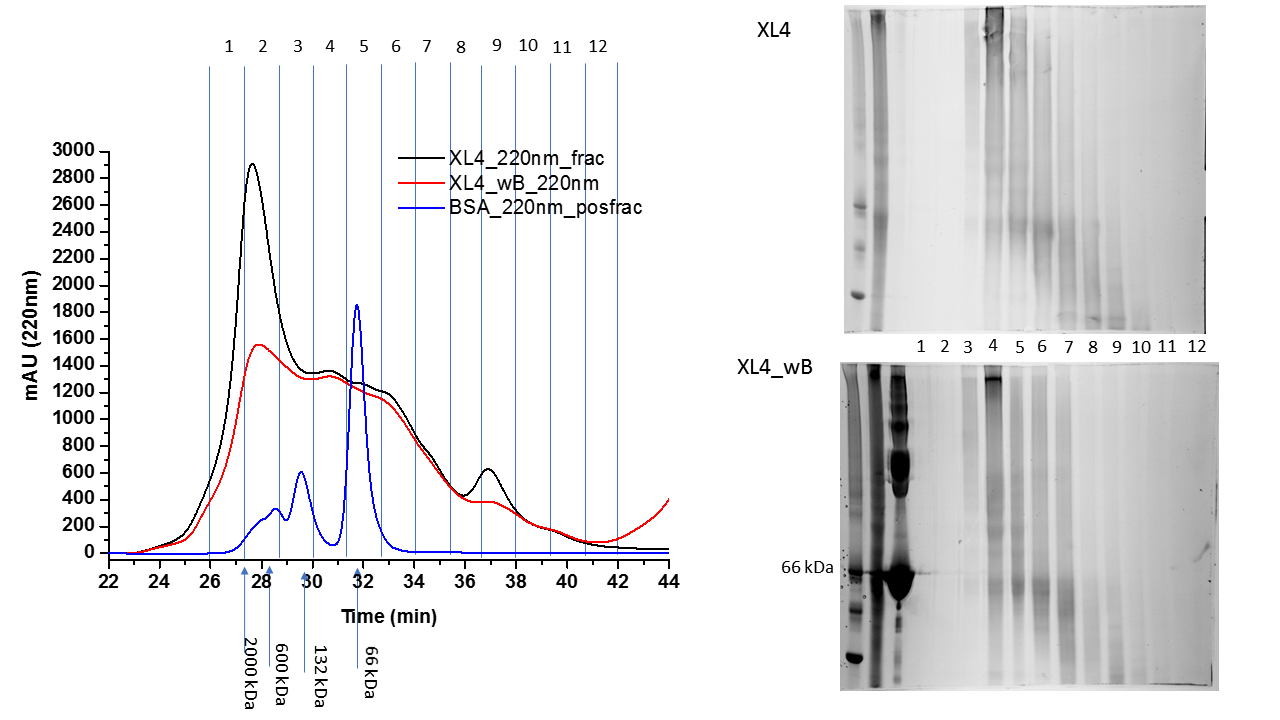

In [72]:
Image('test_small/PD1_4/X-Link_2.png')

In [73]:
#importing some custom function
from make_fig import *

### First we analyze the lfq profile of all the proteins identified with MaxQuant

In [74]:
#import data and remove rubbish entires
in_file = 'test_small/proteinGroups.txt'
test_df = pd.DataFrame.from_csv(in_file, sep='\t')
dsc_diz = dict(zip(test_df.index.values, test_df['Fasta headers']))
df = clean(test_df, ['LFQ intensity '], np.arange(1,11,1))

removed  44 Only identified by site
tot  44  entries removed
---------------
removed  29 Reverse
tot  73  entries removed
---------------
removed  32 Potential contaminant
tot  105  entries removed
---------------
removed  655 Peptide counts (unique)
tot  760  entries removed
---------------
got:  2241 protein now
removed  12 all zeros
tot  772  entries removed
---------------


In [75]:
# normalize dataset by dividing each profile by the max value
df = df.apply(norm_max, axis=1)
#a look the the daa
df.head()

,LFQ intensity 1,LFQ intensity 2,LFQ intensity 3,LFQ intensity 4,LFQ intensity 5,LFQ intensity 6,LFQ intensity 7,LFQ intensity 8,LFQ intensity 9,LFQ intensity 10
Protein IDs,,,,,,,,,,
Tb04.24M18.150:mRNA-p1;Tb927.8.6960:mRNA-p1,0.0,0.000000,0.000000,0.000000,0.544991,0.593487,0.863273,1.0,0.0,0.0
Tb927.5.4460:mRNA-p1;Tb05.5K5.110:mRNA-p1;Tb11.v5.0866.1-p1,1.0,0.247014,0.103757,0.048538,0.022538,0.000000,0.000000,0.0,0.0,0.0
Tb927.5.4480:mRNA-p1;Tb05.5K5.130:mRNA-p1,1.0,0.977232,0.420402,0.199220,0.000000,0.000000,0.000000,0.0,0.0,0.0
Tb927.5.4360:mRNA-p1;Tb05.5K5.20:mRNA-p1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0
Tb927.5.4560:mRNA-p1;Tb11.v5.0409.1-p1;Tb05.5K5.200:mRNA-p1,0.0,0.000000,0.401083,0.500797,1.000000,0.819232,0.438250,0.0,0.0,0.0


In [ ]:
#create the plot
df = plot_experiment(
     df,
     method='ward', 
     metric='euclidean',
     cluster_columns = True,
     order_row_and_columns= False,
     color_map_id='cool',
     figsize=(6, 8),
     cut_distance_cols=40,
     cut_distance_rows=2,
     step_first_x = 1,
     title='all',
     fig_name = 'all.svg',
     add_second_axis={'label':'MW kDa',
                      'values': {
                      2:'2000', 
                      3:'600', 
                      4:'132', 
                      5:'66', 
                      } 
                      },
    height_ratios=[1, 8],
    hspace=0.02

     )


df['desc'] = [get_description(dsc_diz[n]) for n in df.index.values]
df.sort_values('clusters',inplace=True)


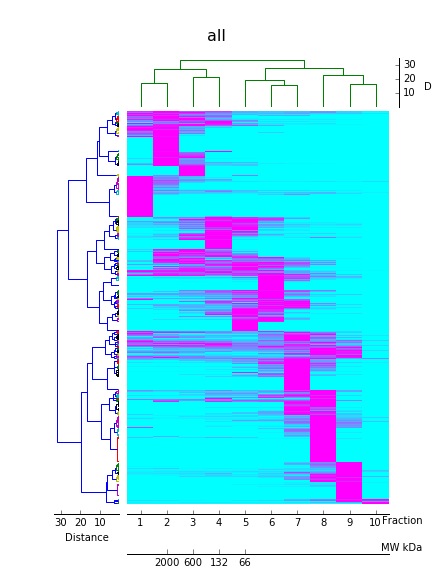

In [77]:
Image('all.png')

### Comments:
#### . Many proteins peak after the 66kd mark

# Let's analize some complexes

In [78]:
from plot_complex import *

In [79]:
%matplotlib inline
second_axis_params={'label':'MW kDa','values': {
                                                                      
                          2:'2000', 
                          3:'600', 
                          4:'132', 
                          5:'66', 
                          } 
                          }


## Some examples of protein complexes we found in Thomas paper
### Where the proteasome sits?
#### proteasome core 

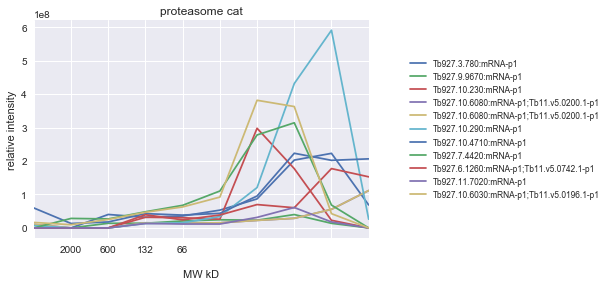

In [80]:

prots = [
'Tb927.3.780:mRNA-p1',
'Tb927.9.9670:mRNA-p1',
'Tb927.10.230:mRNA-p1',
'Tb927.10.6080:mRNA-p1;Tb11.v5.0200.1-p1',
'Tb927.10.6080:mRNA-p1;Tb11.v5.0200.1-p1',
'Tb927.10.290:mRNA-p1',
'Tb927.10.4710:mRNA-p1',
'Tb927.7.4420:mRNA-p1',
'Tb927.6.1260:mRNA-p1;Tb11.v5.0742.1-p1',
'Tb927.11.7020:mRNA-p1',
'Tb927.10.6030:mRNA-p1;Tb11.v5.0196.1-p1']

df = pd.read_csv('test_raw.csv',index_col='Protein IDs') 
df = df.iloc[:,0:10] 
#print df.head()
fig, ax=plt.subplots()       
plot_line(df.loc[prots], ax, 'proteasome cat')
#add_second_axis(ax, second_axis_params, df)


#### proteasome regulatory

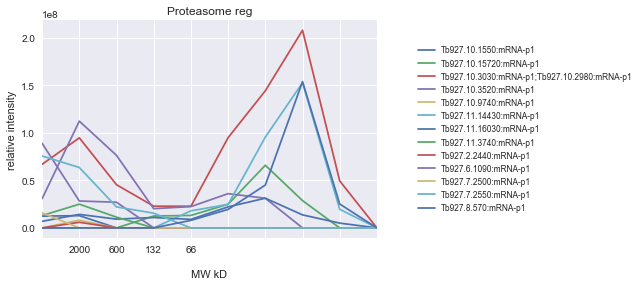

In [81]:
prots = ['Tb927.10.1550:mRNA-p1',
        'Tb927.10.15720:mRNA-p1',
        'Tb927.10.3030:mRNA-p1;Tb927.10.2980:mRNA-p1',
        'Tb927.10.3520:mRNA-p1',
        'Tb927.10.9740:mRNA-p1',
        'Tb927.11.14430:mRNA-p1',
        'Tb927.11.16030:mRNA-p1',
        'Tb927.11.3740:mRNA-p1',
        'Tb927.2.2440:mRNA-p1',
        'Tb927.6.1090:mRNA-p1',
        'Tb927.7.2500:mRNA-p1',
        'Tb927.7.2550:mRNA-p1',
        'Tb927.8.570:mRNA-p1']
fig, ax=plt.subplots()       
plot_line(df.loc[prots], ax, 'Proteasome reg') 

#### Prefoldin

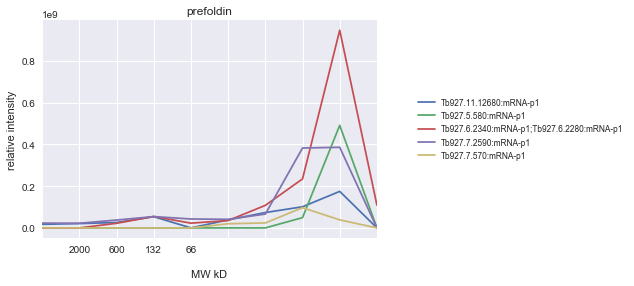

In [82]:
#prefoldin
prots = ['Tb927.11.12680:mRNA-p1',
    'Tb927.5.580:mRNA-p1',
    'Tb927.6.2340:mRNA-p1;Tb927.6.2280:mRNA-p1',
   'Tb927.7.2590:mRNA-p1',
    'Tb927.7.570:mRNA-p1']
fig, ax=plt.subplots()       
plot_line(df.loc[prots], ax, 'prefoldin')

#### Atp Syntase

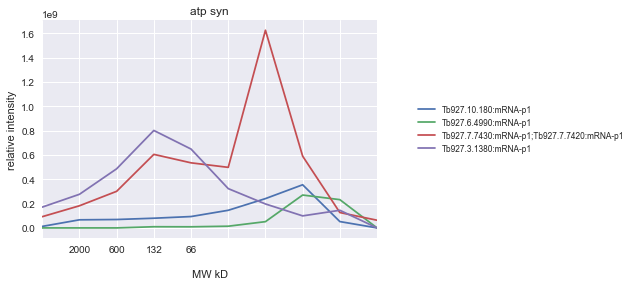

In [83]:
#atp syn
prots=['Tb927.10.180:mRNA-p1',
       'Tb927.6.4990:mRNA-p1',
       'Tb927.7.7430:mRNA-p1;Tb927.7.7420:mRNA-p1',
       'Tb927.3.1380:mRNA-p1'
] 
fig, ax=plt.subplots()       
plot_line(df.loc[prots], ax, 'atp syn')

#### Vacuolar Atp Syntase

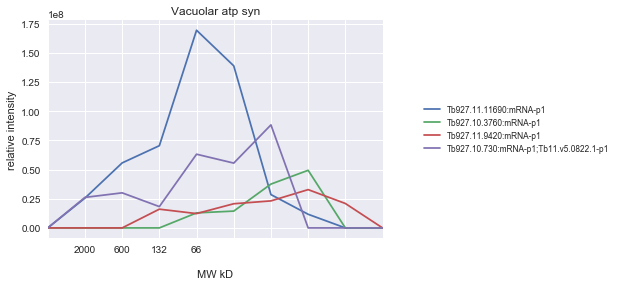

In [84]:
prots=['Tb927.11.11690:mRNA-p1',
'Tb927.10.3760:mRNA-p1',
'Tb927.11.9420:mRNA-p1',
'Tb927.10.730:mRNA-p1;Tb11.v5.0822.1-p1']
fig, ax=plt.subplots()       
plot_line(df.loc[prots], ax, 'Vacuolar atp syn')

#### Oxoisovalerate

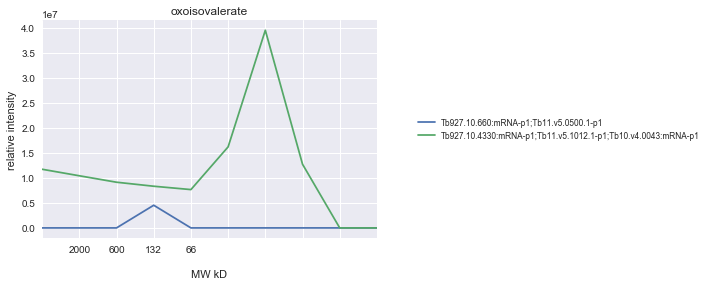

In [85]:
#oxoisovalerate
prots = ['Tb927.10.660:mRNA-p1;Tb11.v5.0500.1-p1',
    'Tb927.10.4330:mRNA-p1;Tb11.v5.1012.1-p1;Tb10.v4.0043:mRNA-p1']  
fig, ax=plt.subplots()       
plot_line(df.loc[prots], ax, 'oxoisovalerate')

#### N-acetyltransferase

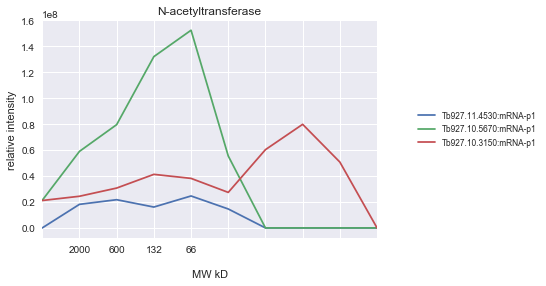

In [86]:
#N-acetyltransferase              
prots = [    
    'Tb927.11.4530:mRNA-p1',
   'Tb927.10.5670:mRNA-p1',
    'Tb927.10.3150:mRNA-p1']
fig, ax=plt.subplots()       
plot_line(df.loc[prots], ax, 'N-acetyltransferase') 

#### T-complex

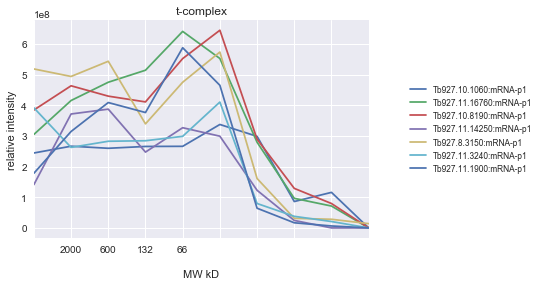

In [87]:
#t-complex
prots = [
             'Tb927.10.1060:mRNA-p1',
             'Tb927.11.16760:mRNA-p1',
             'Tb927.10.8190:mRNA-p1',
             'Tb927.11.14250:mRNA-p1',
             'Tb927.8.3150:mRNA-p1',
             'Tb927.11.3240:mRNA-p1',
             'Tb927.11.1900:mRNA-p1'
                   ]
fig, ax=plt.subplots()       
plot_line(df.loc[prots], ax, 't-complex') 

#### Mitochondrial processing peptidase

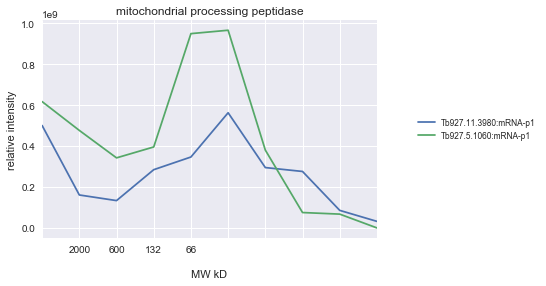

In [88]:
prots = ['Tb927.11.3980:mRNA-p1',
'Tb927.5.1060:mRNA-p1']
fig, ax=plt.subplots()       
plot_line(df.loc[prots], ax, 'mitochondrial processing peptidase') 

#### Major vault protein

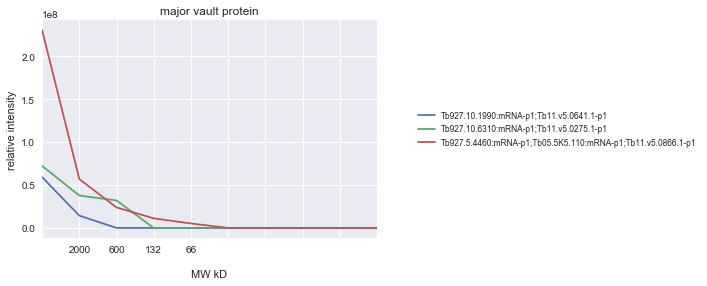

In [92]:
prots = ['Tb927.10.1990:mRNA-p1;Tb11.v5.0641.1-p1',
'Tb927.10.6310:mRNA-p1;Tb11.v5.0275.1-p1',
'Tb927.5.4460:mRNA-p1;Tb05.5K5.110:mRNA-p1;Tb11.v5.0866.1-p1']
fig, ax=plt.subplots()       
plot_line(df.loc[prots], ax, 'major vault protein') 

#### One of the new predicted complexes

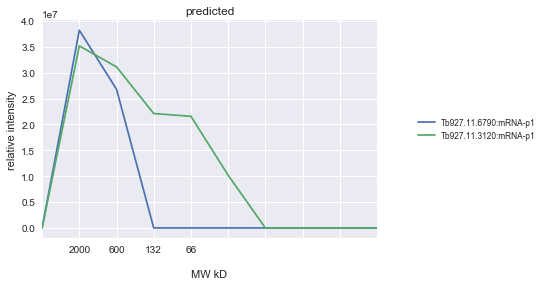

In [94]:
prots = ['Tb927.11.6790:mRNA-p1',
        'Tb927.11.3120:mRNA-p1']
fig, ax=plt.subplots()       
plot_line(df.loc[prots], ax, 'predicted') 

### Conclusion
#### Some complexes sits in the expected range but the majority of the complexe components seems to elute in the monomer / dimer range
#### Possibly we want to increse the crosslinker concentration?

# Analysis at peptide levels

In [ ]:
### We use the maxquant evidence file to get some stats at peptide level

In [133]:
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt 

def print_result(start_df_shape, shape_before, df, what):
    removed = shape_before[0]- df.shape[0]
    removed_from_beginning = start_df_shape[0]-df.shape[0]
    if removed > 0:
        print 'removed ',removed, what   
        print 'tot ', removed_from_beginning, ' entries removed' 
        print '---------------'
    else:
        print what
        print 'nothing removed'
        print '---------------'
        
def clean(df):     
    before,start = df.shape,df.shape
    col = 'Reverse'
    df = df[df[col] != '+']
    print_result(start, before, df, col)
        
    before = df.shape
    col = 'Potential contaminant'
    df = df[df[col] != '+']
    print_result(start, before, df, col)
    
    return df
    
import pandas as pd
df = pd.read_csv('test_small/evidence.txt',sep='\t')
df['logScore']=np.log10(df['Score'])
df = clean(df)
print df.shape


removed  407 Reverse
tot  407  entries removed
---------------
removed  1075 Potential contaminant
tot  1482  entries removed
---------------
(118894, 67)


### Plots the average score across the fraction stratified according the detection type

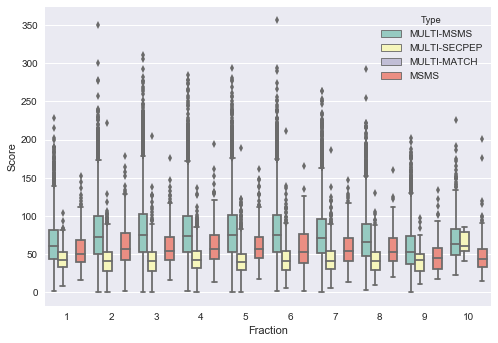

In [134]:
ax = sns.boxplot(x="Fraction", y="Score", hue="Type",data=df, palette="Set3")

### The average score of the DSSTP crosslinked peptides
#### the plots stratifies for the number of modifications  

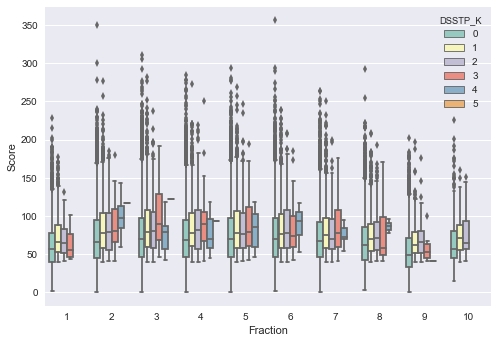

In [135]:
ax = sns.boxplot(x="Fraction", y="Score", hue="DSSTP_K",data=df, palette="Set3")

#### Same plots for protein N-term crosslinked (I think it has to change to any N-term this modification to accaount for processed proteins)

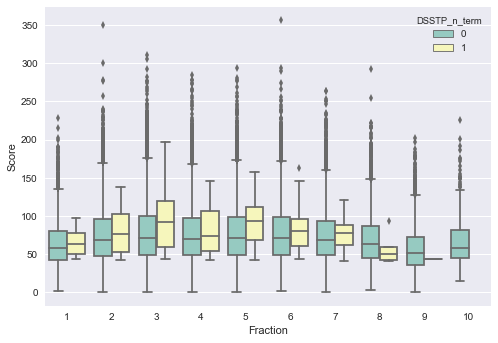

In [136]:
ax = sns.boxplot(x="Fraction", y="Score", hue="DSSTP_n_term",data=df, palette="Set3")


#### Average score of peptides strytified by number of miss cleavage

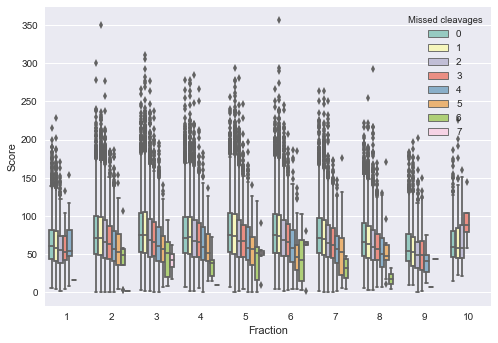

In [137]:
ax = sns.boxplot(x="Fraction", y="Score", hue="Missed cleavages",data=df, palette="Set3")

In [138]:
df['count_pep']=1
temp = df[['DSSTP_K','DSSTP_n_term','count_pep','Fraction']].groupby(["Fraction"]).sum()
temp['fc_DSSTP_K']=temp['DSSTP_K']/temp['count_pep']
temp['fc_DSSTP_n_term']=temp['DSSTP_n_term']/temp['count_pep']
temp['Fraction']=temp.index.values

### Which is the fraction of DTSSP crosslinked peptides?

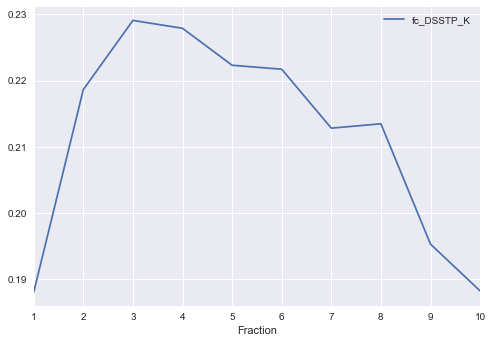

In [139]:
temp.plot(x='Fraction',y='fc_DSSTP_K')

#### in most of the fraction 20% of the identifications have a crosslink modification

### And absolute number

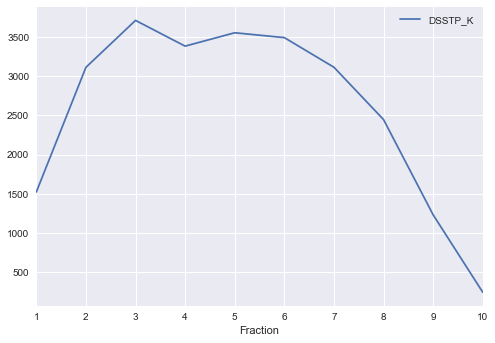

In [140]:
temp.plot(x='Fraction',y='DSSTP_K')

### How many peptides of the proteasome have a crosslinked modification?

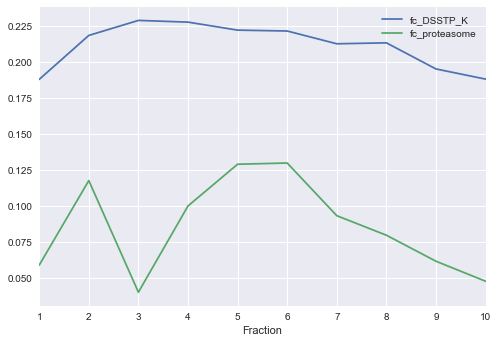

In [144]:
prots = [
'Tb927.3.780:mRNA-p1',
'Tb927.9.9670:mRNA-p1',
'Tb927.10.230:mRNA-p1',
'Tb927.10.6080:mRNA-p1;Tb11.v5.0200.1-p1',
'Tb927.10.6080:mRNA-p1;Tb11.v5.0200.1-p1',
'Tb927.10.290:mRNA-p1',
'Tb927.10.4710:mRNA-p1',
'Tb927.7.4420:mRNA-p1',
'Tb927.6.1260:mRNA-p1;Tb11.v5.0742.1-p1',
'Tb927.11.7020:mRNA-p1',
'Tb927.10.6030:mRNA-p1;Tb11.v5.0196.1-p1']
df['proteasome'] = [1 if n in prots else 0 for n in df['Proteins']]
selection = df[df['proteasome']==1]
#proteasome = df[df['proteasome'].isin(prots)]
selection = selection[['Sequence','Fraction','DSSTP_K']]
selection['tot_detection']=1
selection = selection[['Fraction','DSSTP_K','tot_detection']].groupby('Fraction').sum()
selection['fc_proteasome']=selection['DSSTP_K']/selection['tot_detection']
selection['Fraction']=selection.index.values
fig,ax = plt.subplots()
temp.plot(x='Fraction',y='fc_DSSTP_K',ax=ax)
selection.plot(x='Fraction',y='fc_proteasome',ax=ax)
#temp['DSSTP_K'].value_counts()

### The proteasome core has fewer modified peptides than  average
#### what about other complexes?

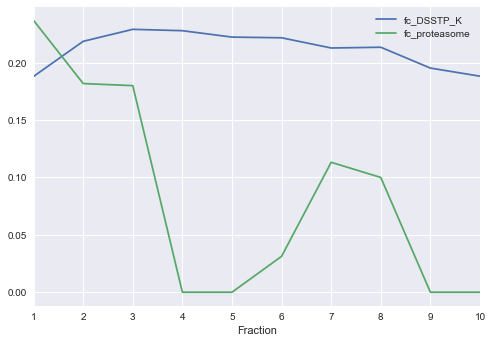

In [145]:
prots = ['Tb927.10.1550:mRNA-p1',
        'Tb927.10.15720:mRNA-p1',
        'Tb927.10.3030:mRNA-p1;Tb927.10.2980:mRNA-p1',
        'Tb927.10.3520:mRNA-p1',
        'Tb927.10.9740:mRNA-p1',
        'Tb927.11.14430:mRNA-p1',
        'Tb927.11.16030:mRNA-p1',
        'Tb927.11.3740:mRNA-p1',
        'Tb927.2.2440:mRNA-p1',
        'Tb927.6.1090:mRNA-p1',
        'Tb927.7.2500:mRNA-p1',
        'Tb927.7.2550:mRNA-p1',
        'Tb927.8.570:mRNA-p1']
df['proteasome'] = [1 if n in prots else 0 for n in df['Proteins']]
selection = df[df['proteasome']==1]
#proteasome = df[df['proteasome'].isin(prots)]
selection = selection[['Sequence','Fraction','DSSTP_K']]
selection['tot_detection']=1
selection = selection[['Fraction','DSSTP_K','tot_detection']].groupby('Fraction').sum()
selection['fc_proteasome']=selection['DSSTP_K']/selection['tot_detection']
selection['Fraction']=selection.index.values
fig,ax = plt.subplots()
temp.plot(x='Fraction',y='fc_DSSTP_K',ax=ax)
selection.plot(x='Fraction',y='fc_proteasome',ax=ax)
#temp['DSSTP_K'].value_counts()


#### Same for the regulatory subunit of the protesome

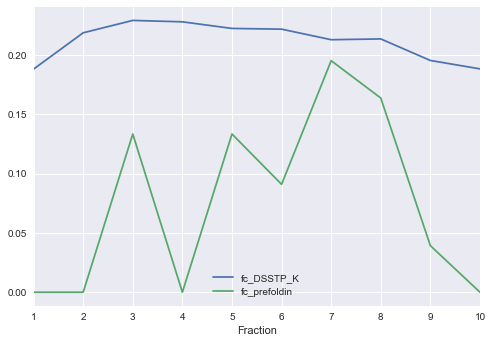

In [150]:
#prefoldin
prots = ['Tb927.11.12680:mRNA-p1',
    'Tb927.5.580:mRNA-p1',
    'Tb927.6.2340:mRNA-p1;Tb927.6.2280:mRNA-p1',
   'Tb927.7.2590:mRNA-p1',
    'Tb927.7.570:mRNA-p1']
df['proteasome'] = [1 if n in prots else 0 for n in df['Proteins']]
selection = df[df['proteasome']==1]
#proteasome = df[df['proteasome'].isin(prots)]
selection = selection[['Sequence','Fraction','DSSTP_K']]
selection['tot_detection']=1
selection = selection[['Fraction','DSSTP_K','tot_detection']].groupby('Fraction').sum()
selection['fc_prefoldin']=selection['DSSTP_K']/selection['tot_detection']
selection['Fraction']=selection.index.values
fig,ax = plt.subplots()
temp.plot(x='Fraction',y='fc_DSSTP_K',ax=ax)
selection.plot(x='Fraction',y='fc_prefoldin',ax=ax)
#temp['DSSTP_K'].value_counts()


#### Same for the prefoldin complex

,DSSTP_K,tot_detection,fc_MVP,Fraction
Fraction,,,,
1,1,14,0.071429,1
2,2,19,0.105263,2
3,1,8,0.125000,3
4,0,1,0.000000,4


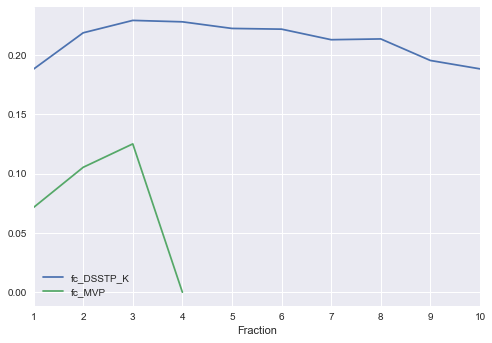

In [154]:
#Major vault protein
prots = ['Tb927.10.1990:mRNA-p1;Tb11.v5.0641.1-p1',
'Tb927.10.6310:mRNA-p1;Tb11.v5.0275.1-p1',
'Tb927.5.4460:mRNA-p1;Tb05.5K5.110:mRNA-p1;Tb11.v5.0866.1-p1']
df['proteasome'] = [1 if n in prots else 0 for n in df['Proteins']]
selection = df[df['proteasome']==1]
#proteasome = df[df['proteasome'].isin(prots)]
selection = selection[['Sequence','Fraction','DSSTP_K']]
selection['tot_detection']=1
selection = selection[['Fraction','DSSTP_K','tot_detection']].groupby('Fraction').sum()
selection['fc_MVP']=selection['DSSTP_K']/selection['tot_detection']
selection['Fraction']=selection.index.values
fig,ax = plt.subplots()
temp.plot(x='Fraction',y='fc_DSSTP_K',ax=ax)
selection.plot(x='Fraction',y='fc_MVP',ax=ax)
selection


#### For the MVP, we detect peptides only at high molecular weight, but a small amount have modification

,DSSTP_K,tot_detection,fc_tcomplex,Fraction
Fraction,,,,
1,9,137,0.065693,1
2,68,320,0.212500,2
3,58,333,0.174174,3
4,41,267,0.153558,4
5,62,361,0.171745,5
6,64,363,0.176309,6
7,34,222,0.153153,7
8,8,98,0.081633,8
9,1,37,0.027027,9


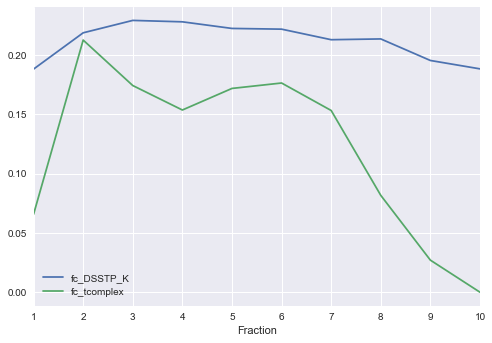

In [157]:
#tcomplex
prots = [
             'Tb927.10.1060:mRNA-p1',
             'Tb927.11.16760:mRNA-p1',
             'Tb927.10.8190:mRNA-p1',
             'Tb927.11.14250:mRNA-p1',
             'Tb927.8.3150:mRNA-p1',
             'Tb927.11.3240:mRNA-p1',
             'Tb927.11.1900:mRNA-p1'
                   ]
df['tcomplex'] = [1 if n in prots else 0 for n in df['Proteins']]
selection = df[df['tcomplex']==1]
#proteasome = df[df['proteasome'].isin(prots)]
selection = selection[['Sequence','Fraction','DSSTP_K']]
selection['tot_detection']=1
selection = selection[['Fraction','DSSTP_K','tot_detection']].groupby('Fraction').sum()
selection['fc_tcomplex']=selection['DSSTP_K']/selection['tot_detection']
selection['Fraction']=selection.index.values
fig,ax = plt.subplots()
temp.plot(x='Fraction',y='fc_DSSTP_K',ax=ax)
selection.plot(x='Fraction',y='fc_tcomplex',ax=ax)
#temp['DSSTP_K'].value_counts()
selection
